### Check:

- Determination of Moisture in Rice Grains Based on Visible Spectrum Analysis

  - https://www.mdpi.com/2073-4395/12/12/3021

In [1]:
!wget https://raw.githubusercontent.com/marsgr6/r-scripts/5021a587f4ac39261890652b7d6ccb18aac857d6/imgs/H14_093304.jpg

--2023-01-07 19:02:30--  https://raw.githubusercontent.com/marsgr6/r-scripts/5021a587f4ac39261890652b7d6ccb18aac857d6/imgs/H14_093304.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3439002 (3.3M) [image/jpeg]
Saving to: ‘H14_093304.jpg.4’

H14_093304.jpg.4    100%[===================>]   3.28M  6.85MB/s    in 0.5s    

2023-01-07 19:02:31 (6.85 MB/s) - ‘H14_093304.jpg.4’ saved [3439002/3439002]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image

In [3]:
img = Image.open('H14_093304.jpg')
img.size

(4128, 3096)

In [4]:
# this the center of the image
w, h = (np.array(img.size) / 2).astype('int')
w, h

(2064, 1548)

In [5]:
# new image dimensions
cw, ch = 660, 660

box = (w-cw)//2, (h-ch)//2, (w+cw)//2, (h+ch)//2
box

(702, 444, 1362, 1104)

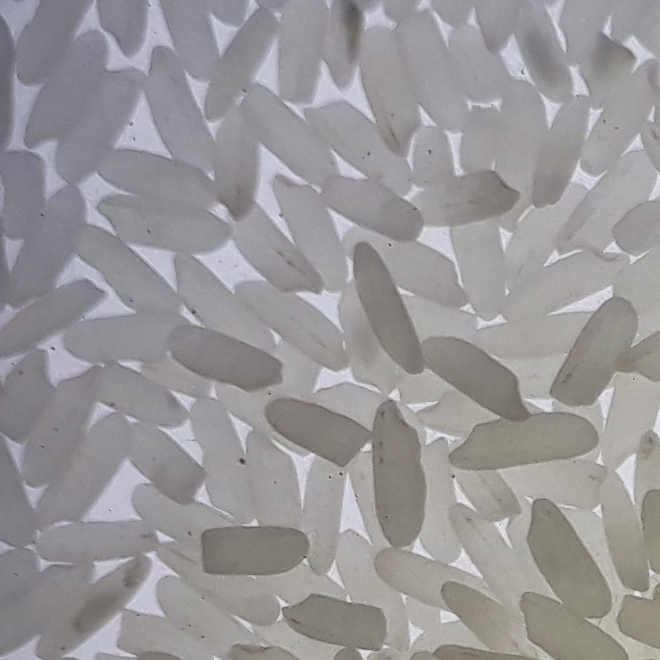

In [6]:
img_cropped = img.crop(box)
img_cropped

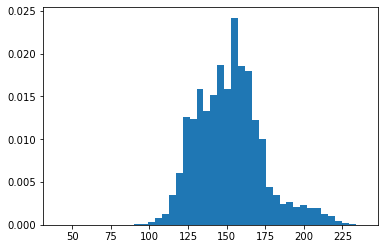

In [7]:
# Get all the pixesl in a vector 1D
pixels = np.array(img_cropped).flatten()
h = plt.hist(pixels, bins=44, density=True)

In [8]:
h[0], len(h[0]), 660*660

(array([5.12741629e-07, 5.12741629e-07, 3.41827753e-07, 1.02548326e-06,
        8.54569382e-07, 3.41827753e-07, 1.88005264e-06, 2.90553590e-06,
        7.86203832e-06, 1.36731101e-05, 3.11063255e-05, 4.75140577e-05,
        1.28527235e-04, 2.85084346e-04, 8.20386607e-04, 1.20528466e-03,
        3.47279906e-03, 6.10606915e-03, 1.26219898e-02, 1.23066537e-02,
        1.59059290e-02, 1.32931686e-02, 1.51551043e-02, 1.86971235e-02,
        1.59069545e-02, 2.41826044e-02, 1.85904733e-02, 1.79627066e-02,
        1.22603360e-02, 1.00382847e-02, 4.43042951e-03, 3.49365055e-03,
        2.37057547e-03, 2.68334786e-03, 2.04071169e-03, 2.36630262e-03,
        1.96123673e-03, 1.91132988e-03, 1.26322446e-03, 1.07727016e-03,
        4.41470543e-04, 2.11078637e-04, 4.34121246e-05, 8.20386607e-06]),
 44,
 435600)

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')
data.humidity = data.humidity.astype(str)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,humidity
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.012158,0.044333,0.354619,0.098181,0.124926,0.136753,0.008118,0.000009,0.000000,10
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.014039,0.018889,0.141064,0.151785,0.089501,0.119041,0.040481,0.001417,0.000000,10
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.018064,0.023848,0.141680,0.120306,0.108169,0.121783,0.027558,0.000676,0.000000,10
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.029847,0.022650,0.035885,0.074686,0.087595,0.107312,0.082734,0.014666,0.000054,10
4,0.0,0.0,0.0,0.000009,0.0,0.000009,0.000027,0.000018,0.000045,0.00009,...,0.015860,0.043084,0.339896,0.143472,0.115284,0.128973,0.035604,0.001162,0.000000,10


In [10]:
data.iloc[:,:-1].describe()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.000014,0.000028,0.000065,0.000128,0.000214,0.000966,0.005213,0.001067,0.000116,0.000171,...,0.027661,0.031278,0.087876,0.190515,0.112837,0.103457,0.116627,0.032822,0.001430,0.000002
std,0.000114,0.000201,0.000394,0.000689,0.001124,0.007024,0.035924,0.006590,0.000315,0.000339,...,0.023420,0.031301,0.091787,0.095035,0.032029,0.020023,0.048207,0.023983,0.002411,0.000012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007444,0.007756,0.011540,0.028937,0.037259,0.043105,0.007829,0.000086,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012980,0.014053,0.027827,0.125638,0.089162,0.090107,0.082844,0.010775,0.000047,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,...,0.020033,0.019908,0.046835,0.171026,0.108850,0.102421,0.123879,0.030658,0.000638,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.000081,0.000188,...,0.028884,0.037133,0.108597,0.247400,0.133112,0.114255,0.151436,0.049145,0.001721,0.000000
max,0.001474,0.002317,0.003440,0.004835,0.009255,0.090649,0.377729,0.075797,0.002356,0.001916,...,0.141751,0.253941,0.415862,0.537803,0.236872,0.181483,0.234865,0.116686,0.018232,0.000134


<AxesSubplot:>

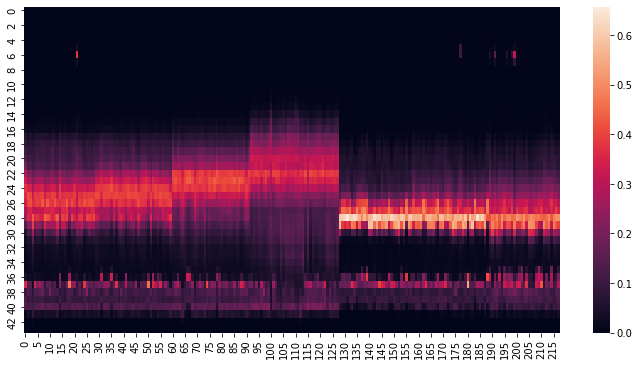

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data.iloc[:,:-1].T)

<BarContainer object of 7 artists>

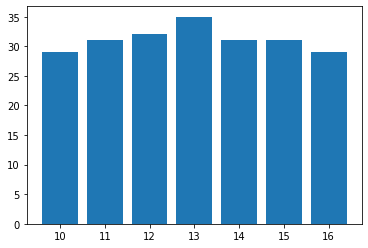

In [12]:
plt.bar(*np.unique(data.humidity, return_counts=True))

<AxesSubplot:xlabel='humidity', ylabel='22'>

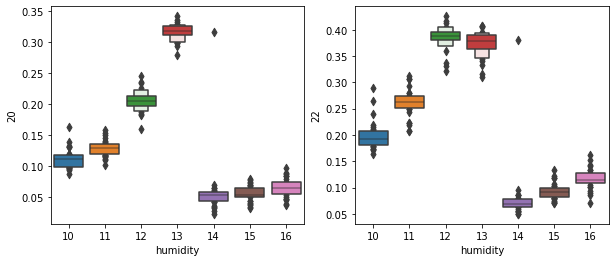

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxenplot(data=data, x='humidity', y='20')
plt.subplot(1,2,2)
sns.boxenplot(data=data, x='humidity', y='22')

<AxesSubplot:xlabel='22', ylabel='Density'>

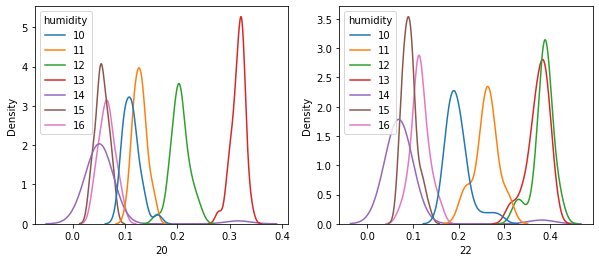

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data=data, hue='humidity', x='20')
plt.subplot(1,2,2)
sns.kdeplot(data=data, hue='humidity', x='22')

<AxesSubplot:xlabel='20', ylabel='22'>

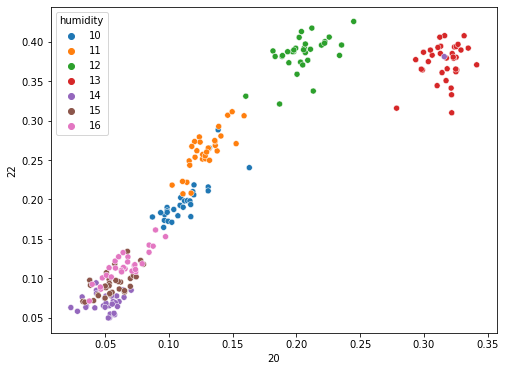

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='20', y='22', hue='humidity')

### Instructions

- Describe your dataset and how you built it.

**Scenarios**

- In general build models from splitting the dataset columns in two:

    - **First**: Mean, std, width, height
    - **Second**: 28Sum_R + 28Sum_C
    - **Optional Third**: use first and second

- Build two types of problems (models):
  - **First**: Classifiers. Classes are the digits $digit \in \{0,1, \dots, 9 \}$
  - **Second**: Regressors. Round to the nearest integer, i.e.: 8.9 would be 9, 7.2 would be 7.
  - Set limits for the regressor ouput $\hat{y}$.
    - If $\hat{y} < 0$, make $\hat{y} = 0$.
    - If $\hat{y} > 9$, make $\hat{y} = 9$.

**Model for each scenario**

- Perform the usual steps to build a ML model.
  - **Select ML algorithm (from MLP, RandomForest, XGBoost, and research others, select at least 2).**
  - Preprocess the input accordingly. 
  - Build (train) the model 
    - Hyperparameter optimization 
  - Evaluate (test) the models (classification)
    - Cross validation

- Conclude

- **Check:** Determination of Moisture in Rice Grains Based on Visible Spectrum Analysis
  - https://www.mdpi.com/2073-4395/12/12/3021
  - https://www.featureranking.com/tutorials/machine-learning-tutorials/
  - https://anaconda.org/marsgr6/python3_course_content/notebook

In [16]:
# Get X and labels y
X = data.iloc[:,:-1]
y = data['humidity']

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the whole dataset and default parameters
clf.fit(X, y)

y_pred=clf.predict(X)

print(classification_report(y, y_pred))

confusion_matrix(y, y_pred)

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        31
          16       1.00      1.00      1.00        29

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0, 29]])

In [18]:
from sklearn.model_selection import KFold

cv_method = KFold(n_splits=10)  # change n_splits for your dataset

In [19]:
params_RF = {'n_estimators': [40, 70, 100, 200, 300, 400, 500, 1000], 
              'criterion': ['gini', 'entropy']}

In [20]:
from sklearn.model_selection import GridSearchCV

gs_RF = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=params_RF, 
                     cv=cv_method,
                     verbose=1,  # verbose: the higher, the more messages
                     scoring='accuracy', 
                     return_train_score=True)

In [21]:
gs_RF.fit(X, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [40, 70, 100, 200, 300, 400, 500,
                                          1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [22]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['accuracy'] = gs_RF.cv_results_['mean_test_score']
results_RF

,criterion,n_estimators,accuracy
0,gini,40,0.802165
1,gini,70,0.806494
2,gini,100,0.829870
3,gini,200,0.801948
4,gini,300,0.820346
5,gini,400,0.820130
6,gini,500,0.806494
7,gini,1000,0.820563
8,entropy,40,0.792857
9,entropy,70,0.820130


{'criterion': 'gini', 'n_estimators': 100}

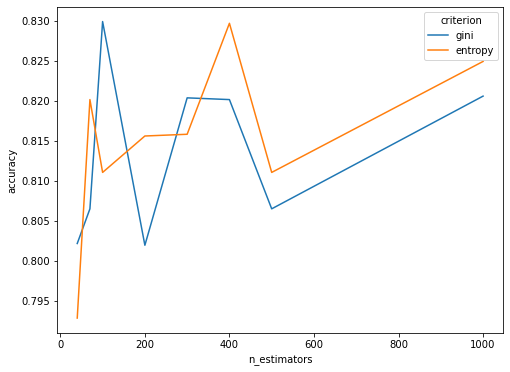

In [23]:
plt.figure(figsize=(8,6))
sns.lineplot(data=results_RF, x='n_estimators', y='accuracy', hue='criterion')
gs_RF.best_params_

In [24]:
best_params = []
for i in range(10):
    gs_RF.fit(X, y)
    best_params += [gs_RF.best_params_]
best_params

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[{'criterion': 'gini', 'n_estimators': 200},
 {'criterion': 'gini', 'n_estimators': 400},
 {'criterion': 'gini', 'n_estimators': 1000},
 {'criterion': 'gini', 'n_estimators': 300},
 {'criterion': 'gini', 'n_estimators': 40},
 {'criterion': 'gini', 'n_estimators': 100},
 {'criterion': 'gini', 'n_estimators': 40},
 {'criterion': 'entropy', 'n_estimators': 400},
 {'criterion': 'entropy', 'n_estimators': 500},
 {'criterion': 'gini', 'n_estimators': 300}]

In [25]:
from sklearn.model_selection import cross_val_score

best_RF = RandomForestClassifier(n_estimators=300, criterion='gini')

scores = cross_val_score(best_RF, X, y, cv=cv_method)

<AxesSubplot:>

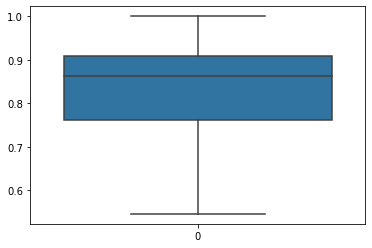

In [26]:
sns.boxplot(scores)

In [27]:
scores.mean(), scores.min(), scores.max()

(0.8160173160173161, 0.5454545454545454, 1.0)

In [28]:
best_RF.fit(X, y)

y_pred = best_RF.predict(X)

print(classification_report(y, y_pred))

confusion_matrix(y, y_pred)

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        31
          16       1.00      1.00      1.00        29

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0, 29]])